# MLE Regression

https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f

## Scientific computing in Python   (https://scipy.org)

In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats

import statsmodels.api as sm

In [2]:
# generate random data
N = 100

x = np.linspace(0,10,N)
e = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + e

df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1.
print(df.head())

           y        x  constant
0  -2.278503  0.00000       1.0
1   4.953182  0.10101       1.0
2   5.047327  0.20202       1.0
3  13.092973  0.30303       1.0
4   2.266363  0.40404       1.0


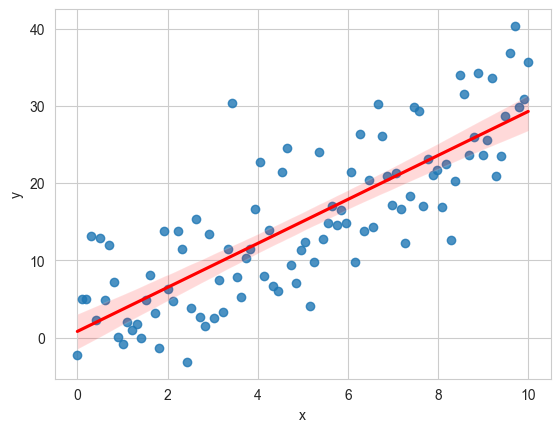

In [3]:
sns.regplot(x=df.x, y=df.y, line_kws={"color": "red"});

In [4]:
# split features and target
X = df[['constant', 'x']]# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     184.1
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           3.12e-24
Time:                        23:19:28   Log-Likelihood:                -322.01
No. Observations:                 100   AIC:                             648.0
Df Residuals:                      98   BIC:                             653.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.8073      1.214      0.665      0.508      -1.603       3.217
x              2.8471      0.210     13.569      0.000       2.431       3.264
==============================================================================
Omnibus:                        4.918   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.831
Skew:                           0.537   Prob(JB):                       0.0893
Kurtosis:                       2.916   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Try different values for N 

## Using scipy optimizer:minimize_scalar() & minimize()  

# Just an example of optimization problem

https://realpython.com/python-scipy-cluster-optimize/

In [5]:
from scipy.optimize import minimize_scalar


def objective_function(x):
    return np.exp( (x-1)**2 )

res = minimize_scalar(objective_function)

print(res)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1.0
       x: 1.0
     nit: 6
    nfev: 9


### Back to our MLE regression

In [6]:
# define likelihood function
# Note that x, y must be global variables
# inputs are guesses about parameter values only
# Priors on parameters are Uniform fistribution (no constraints)

def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2]
    yhat = intercept + beta*x # predictions
    
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd

    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
    
# Laplace errors --> robust regression
#   negLL = -np.sum( stats.laplace.logpdf((y-yhat)))
    
    return(negLL)

In [7]:
guess = np.array([5,5,2])

See Optimization and root finding  (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [8]:
results = minimize(MLERegression, guess, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 322.006708
         Iterations: 118
         Function evaluations: 212


In [9]:
results

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 322.00670820843305
             x: [ 8.074e-01  2.847e+00  6.056e+00]
           nit: 118
          nfev: 212
 final_simplex: (array([[ 8.074e-01,  2.847e+00,  6.056e+00],
                       [ 8.073e-01,  2.847e+00,  6.056e+00],
                       [ 8.073e-01,  2.847e+00,  6.056e+00],
                       [ 8.073e-01,  2.847e+00,  6.056e+00]]), array([ 3.220e+02,  3.220e+02,  3.220e+02,  3.220e+02]))

### Let us assume a Gaussian distribution for each parameter Prior

In [10]:
def MLERegressionWithGaussianPriors(params):
    tau = 1/2
    intercept, beta, sd = params[0], params[1], params[2]
    yhat = intercept + beta*x  # predictions
    negLL = -  ( np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) ) + 
                (np.sum( stats.norm.logpdf( (intercept, beta), loc=0, scale=tau))  ))

    # use stats.laplace.logpdf() for Lasso
    
    return(negLL)

In [11]:
results = minimize(MLERegressionWithGaussianPriors, guess, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 339.020535
         Iterations: 103
         Function evaluations: 180


In [12]:
print(results)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 339.0205354168062
             x: [ 4.713e-01  2.774e+00  6.101e+00]
           nit: 103
          nfev: 180
 final_simplex: (array([[ 4.713e-01,  2.774e+00,  6.101e+00],
                       [ 4.713e-01,  2.774e+00,  6.101e+00],
                       [ 4.713e-01,  2.774e+00,  6.101e+00],
                       [ 4.713e-01,  2.774e+00,  6.101e+00]]), array([ 3.390e+02,  3.390e+02,  3.390e+02,  3.390e+02]))
